In [5]:
#------------------------------------------------------------------
#IMPOTACION DE LIBRERIAS PARA EL DESARROLLO DE LA ACTIVIDAD 
#------------------------------------------------------------------


import pandas as pd #cumple con la funcion de manipular y analizar datos:cargar/mostrar/eliminar nulos

import numpy as np #cumple con la funcion de trabajar listas y operaciones matematcas como el calculo de metricas de error

import matplotlib.pyplot as plt #representa los datos de manera grafica 

import seaborn as sns #mejora la apariencia de los graficos ,de manera mas detallada y estilizada 


#libreria de maching learning
from sklearn.model_selection import train_test_split #divide los datos entre los conjuntos de entrenamiento y prueba

from sklearn.preprocessing import OneHotEncoder, StandardScaler
#'OneHotEncoder'el primer parametro convierte en categorias (marca ,modelo)en numero 
#'StandardScaler'el segundo prarametro normaliza los datos para mejorar la precision del modelo

from sklearn.ensemble import RandomForestRegressor#modelo basado en arboles de desicion,se usa para predecir valores numericos 'regresion'

from sklearn.metrics import mean_absolute_error,mean_squared_error
#calculo de errores y sus raices cuadradas /mide su desviacion/pealiza errores/


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import tree

from imblearn.over_sampling import SMOTE

In [6]:
#------------------------------------------------------------------
#ANALISIS EXPLORATORIO DE DATOS 
#------------------------------------------------------------------


#cargar archivos,esto se hace con la libreria pandas'pd'
dt = pd.read_csv(r"winequality-red.csv")

#cambio del nombre de las variables a español
dt.rename(columns={
    'fixed acidity': 'Acidez_Fija',
    'volatile acidity': 'Acidez_Volátil',
    'citric acid': 'Ácido_Cítrico',
    'residual sugar': 'Azúcar_Residual',
    'chlorides': 'Cloruros',
    'free sulfur dioxide': 'Dióxido_Azufre_Libre',
    'total sulfur dioxide': 'Dióxido_Azufre_Total',
    'density': 'Densidad',
    'pH': 'pH',
    'sulphates': 'Sulfatos',
    'alcohol': 'Alcohol',
    'quality': 'Calidad'
}, inplace=True)

# Mostrar las primeras filas para verificar el cambio
print(dt.head())


   Acidez_Fija  Acidez_Volátil  Ácido_Cítrico  Azúcar_Residual  Cloruros  \
0          7.4            0.70           0.00              1.9     0.076   
1          7.8            0.88           0.00              2.6     0.098   
2          7.8            0.76           0.04              2.3     0.092   
3         11.2            0.28           0.56              1.9     0.075   
4          7.4            0.70           0.00              1.9     0.076   

   Dióxido_Azufre_Libre  Dióxido_Azufre_Total  Densidad    pH  Sulfatos  \
0                  11.0                  34.0    0.9978  3.51      0.56   
1                  25.0                  67.0    0.9968  3.20      0.68   
2                  15.0                  54.0    0.9970  3.26      0.65   
3                  17.0                  60.0    0.9980  3.16      0.58   
4                  11.0                  34.0    0.9978  3.51      0.56   

   Alcohol  Calidad  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3   

In [9]:
#visualiacion de columnas y datatype
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Acidez_Fija           1599 non-null   float64
 1   Acidez_Volátil        1599 non-null   float64
 2   Ácido_Cítrico         1599 non-null   float64
 3   Azúcar_Residual       1599 non-null   float64
 4   Cloruros              1599 non-null   float64
 5   Dióxido_Azufre_Libre  1599 non-null   float64
 6   Dióxido_Azufre_Total  1599 non-null   float64
 7   Densidad              1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   Sulfatos              1599 non-null   float64
 10  Alcohol               1599 non-null   float64
 11  Calidad               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
#estadisticas del dataset
dt.describe()

,Acidez_Fija,Acidez_Volátil,Ácido_Cítrico,Azúcar_Residual,Cloruros,Dióxido_Azufre_Libre,Dióxido_Azufre_Total,Densidad,pH,Sulfatos,Alcohol,Calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
dt.isnull().sum()

Acidez_Fija             0
Acidez_Volátil          0
Ácido_Cítrico           0
Azúcar_Residual         0
Cloruros                0
Dióxido_Azufre_Libre    0
Dióxido_Azufre_Total    0
Densidad                0
pH                      0
Sulfatos                0
Alcohol                 0
Calidad                 0
dtype: int64

In [15]:
dt.duplicated().sum()

240

In [17]:
#------------------------------------------------------------------
#OUTLIERS / VALORES ATÍPICOS
#------------------------------------------------------------------

Q1 = dt['pH'].quantile(0.25)
Q3 = dt['pH'].quantile(0.75)

IQR = Q3 - Q1

outliers = dt[(dt['pH'] < Q1 - 1.5 * IQR) | (dt['pH'] > Q3 + 1.5 * IQR)]

print(outliers[['Acidez_Fija', 'pH']])

      Acidez_Fija    pH
45            4.6  3.90
94            5.0  3.75
95            4.7  3.85
151           9.2  2.74
268           6.9  3.69
276           6.9  3.69
440          12.6  2.88
544          14.3  2.86
553           5.0  3.74
554          15.5  2.92
555          15.5  2.92
557          15.6  2.92
588           5.0  3.72
614           9.2  2.87
650          10.7  2.89
656          10.7  2.89
657          12.0  2.92
695           5.1  3.90
821           4.9  3.71
930           6.6  3.69
934           6.6  3.69
996           5.6  3.71
997           5.6  3.71
1017          8.0  2.89
1018          8.0  2.89
1111          5.4  3.78
1270          5.0  3.70
1300          5.2  3.78
1316          5.4  4.01
1319          9.1  2.90
1321          5.0  4.01
1377          5.2  3.71
1470         10.0  2.88
1488          5.6  3.72
1491          5.6  3.72


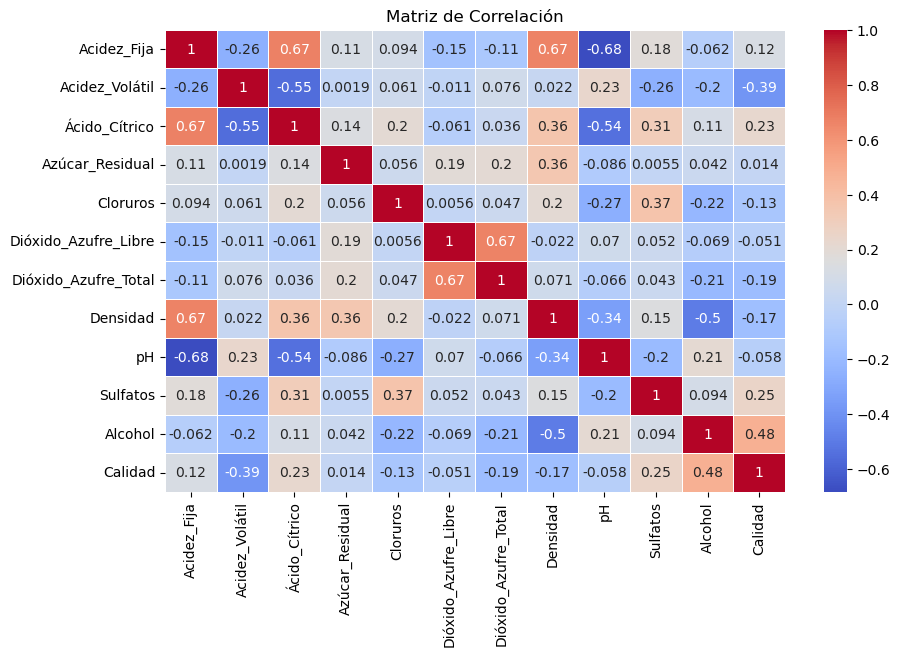

In [19]:
#------------------------------------------
#Correlación: sns.heatmap(), sns.pairplot()
#------------------------------------------

# Matriz de correlación
correlation_matrix = dt.corr(numeric_only=True)

# Mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

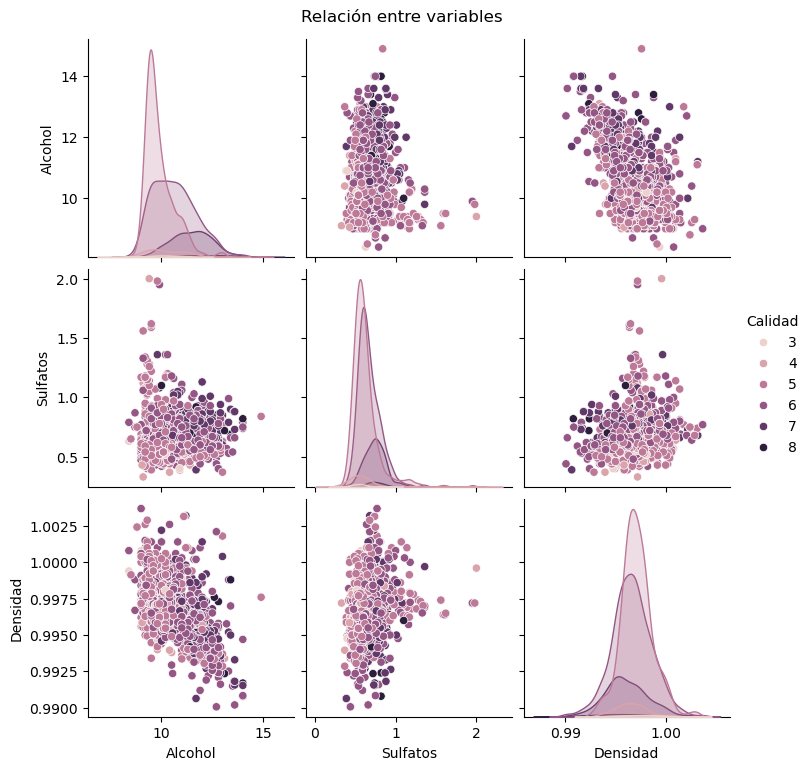

In [22]:
sns.pairplot(dt, vars=['Alcohol', 'Sulfatos', 'Densidad'], hue='Calidad')
plt.suptitle('Relación entre variables', y=1.02)
plt.show()

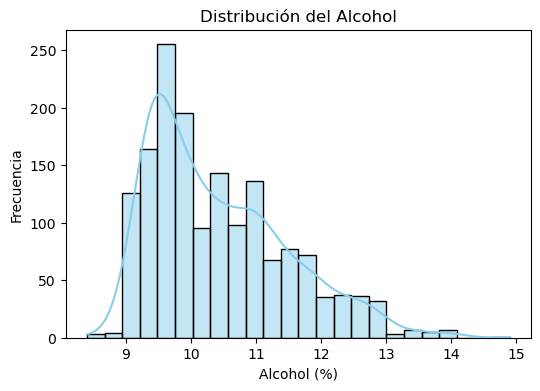

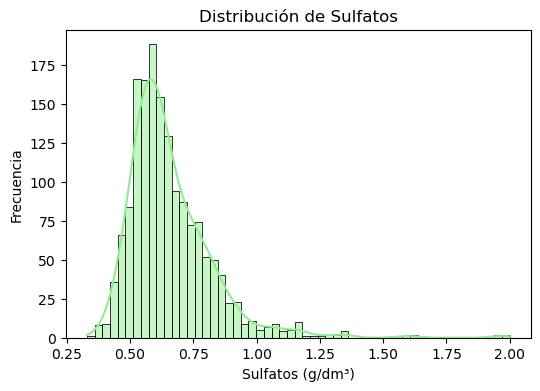

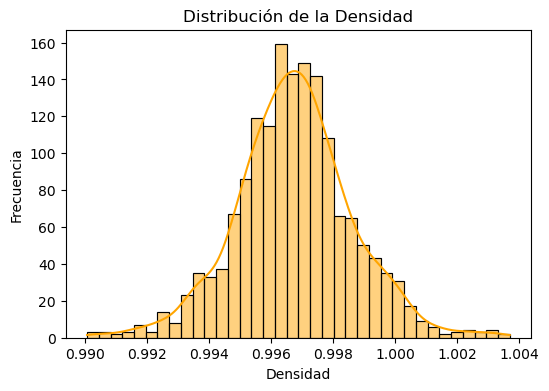

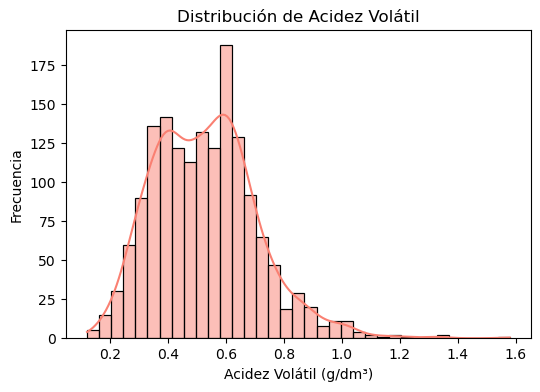

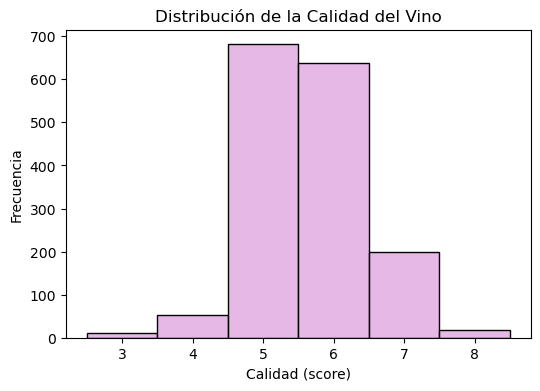

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Alcohol
plt.figure(figsize=(6,4))
sns.histplot(dt['Alcohol'], kde=True, color='skyblue')
plt.title('Distribución del Alcohol')
plt.xlabel('Alcohol (%)')
plt.ylabel('Frecuencia')
plt.show()

# Sulfatos
plt.figure(figsize=(6,4))
sns.histplot(dt['Sulfatos'], kde=True, color='lightgreen')
plt.title('Distribución de Sulfatos')
plt.xlabel('Sulfatos (g/dm³)')
plt.ylabel('Frecuencia')
plt.show()

# Densidad
plt.figure(figsize=(6,4))
sns.histplot(dt['Densidad'], kde=True, color='orange')
plt.title('Distribución de la Densidad')
plt.xlabel('Densidad')
plt.ylabel('Frecuencia')
plt.show()

# Acidez Volátil
plt.figure(figsize=(6,4))
sns.histplot(dt['Acidez_Volátil'], kde=True, color='salmon')
plt.title('Distribución de Acidez Volátil')
plt.xlabel('Acidez Volátil (g/dm³)')
plt.ylabel('Frecuencia')
plt.show()

# Calidad
plt.figure(figsize=(6,4))
sns.histplot(dt['Calidad'], kde=False, discrete=True, color='plum')
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad (score)')
plt.ylabel('Frecuencia')
plt.show()


In [25]:
# Definir las características (X) y la variable objetivo (y)
X = dt.drop('Calidad', axis=1)  # Eliminar la columna 'Calidad' para las características
y = dt['Calidad']  # La variable objetivo es 'Calidad'

In [26]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Estandarizar las características (opcional, pero recomendado para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Inicializar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)


In [29]:
# Entrenar el modelo
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
# Hacer predicciones
y_pred = model.predict(X_test_scaled)

In [32]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [33]:
# Mostrar los resultados
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.57
Confusion Matrix:
[[  0   0   1   0   0   0]
 [  0   1  10   5   1   0]
 [  1   8 127  57   2   0]
 [  0   5  49 120  26   0]
 [  0   1   6  26  26   2]
 [  0   0   0   3   2   1]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.06      0.06        17
           5       0.66      0.65      0.65       195
           6       0.57      0.60      0.58       200
           7       0.46      0.43      0.44        61
           8       0.33      0.17      0.22         6

    accuracy                           0.57       480
   macro avg       0.35      0.32      0.33       480
weighted avg       0.57      0.57      0.57       480



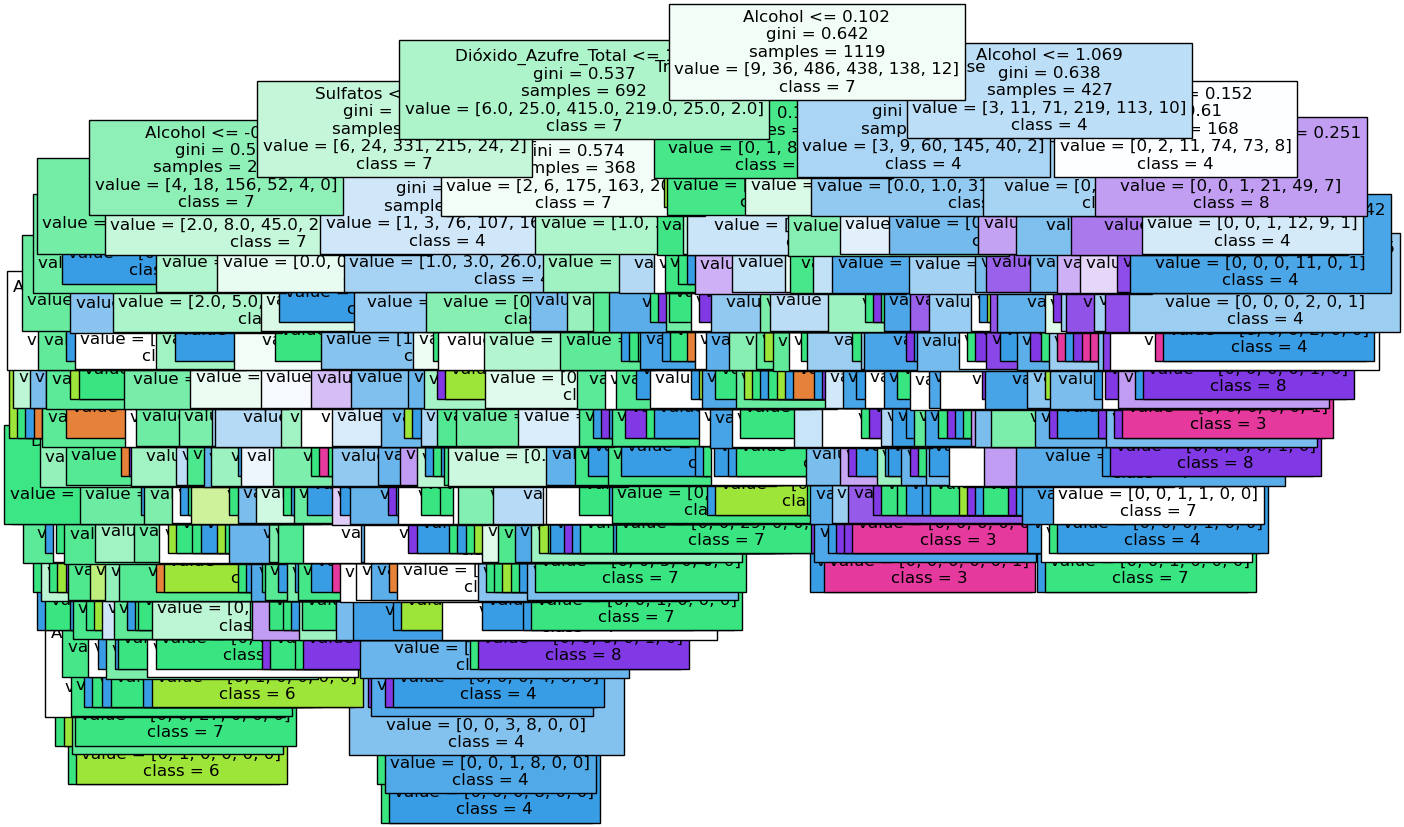

In [34]:
plt.figure(figsize=(15,10))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=[str(i) for i in y.unique()], fontsize=12)
plt.show()